### 1.Import all the packages and Load the data

In [1]:
# only for those who are using NVIDA GPU to run Tensorflow 
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import tensorflow as tf
import keras.api._v2.keras as keras
import os
import numpy as np
from matplotlib import pyplot as plt
import datetime

In [3]:
data_dir = 'Data'

In [4]:
print(os.listdir(data_dir))

['Negative', 'Positive']


In [5]:
# Load image dataset using Keras
data = keras.utils.image_dataset_from_directory('Data')

# Write directory for tensorboard
LOGS_PATH = os.path.join(os.getcwd(),'tensorboard_logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

Found 40000 files belonging to 2 classes.


In [6]:
# laod hte image dataset inside the pet food feeder aka iterator
#pour the pet food into pet food feeder
data_iterator = data.as_numpy_iterator()

In [7]:
#batch is the food that comes out from the pet food feeder
#after we process the release food button of the feeder aka .next()
batch = data_iterator.next()

In [8]:
print(batch) #([array of image], [array of labels/target])

(array([[[[196.     , 189.     , 173.     ],
         [196.     , 189.     , 173.     ],
         [196.     , 189.     , 173.     ],
         ...,
         [209.     , 202.     , 186.     ],
         [209.     , 202.     , 186.     ],
         [209.     , 202.     , 186.     ]],

        [[196.     , 189.     , 173.     ],
         [196.68903, 189.68903, 173.68903],
         [196.83008, 189.83008, 173.83008],
         ...,
         [208.16992, 201.16992, 185.16992],
         [208.16992, 201.16992, 185.16992],
         [208.16992, 201.16992, 185.16992]],

        [[196.7168 , 189.7168 , 173.7168 ],
         [197.54688, 190.54688, 174.54688],
         [198.23059, 191.23059, 175.23059],
         ...,
         [207.2832 , 200.2832 , 184.2832 ],
         [207.2832 , 200.2832 , 184.2832 ],
         [207.2832 , 200.2832 , 184.2832 ]],

        ...,

        [[200.15039, 191.15039, 176.15039],
         [200.98047, 191.98047, 176.98047],
         [202.58398, 193.58398, 178.58398],
         ...,

In [9]:
print(batch[0].shape) #32 images, each height and width is 256 and channel is 3 (rgb)

(32, 256, 256, 3)


In [10]:
print(batch[0][:4].shape) #want the first 4 image

(4, 256, 256, 3)


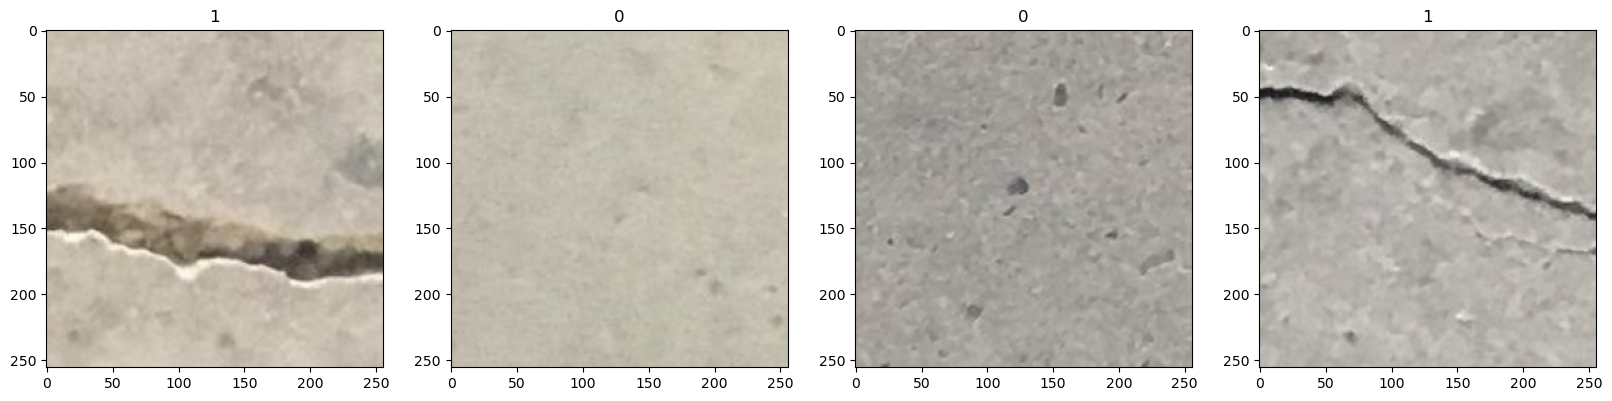

In [11]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### 2. Scale the data

In [12]:
print(batch[0][1])
# print data in the form of array for 2nd image
# lowest is 0, highest is 255

[[[190.      184.      172.     ]
  [191.66016 185.66016 173.66016]
  [194.15039 188.15039 176.15039]
  ...
  [199.7168  193.7168  177.7168 ]
  [199.      193.      177.     ]
  [199.      193.      177.     ]]

 [[190.      184.      172.     ]
  [191.66016 185.66016 173.66016]
  [194.15039 188.15039 176.15039]
  ...
  [201.37695 195.37695 179.37695]
  [200.5191  194.5191  178.5191 ]
  [199.83008 193.83008 177.83008]]

 [[192.15039 186.15039 174.15039]
  [193.21555 187.21555 175.21555]
  [195.07019 189.07019 177.07019]
  ...
  [203.15039 197.15039 181.15039]
  [202.26367 196.26367 180.26367]
  [201.4336  195.4336  179.4336 ]]

 ...

 [[186.      180.      166.     ]
  [188.25516 182.25516 168.25516]
  [191.07019 185.07019 171.07019]
  ...
  [197.      194.      177.     ]
  [196.83008 193.83008 176.83008]
  [196.      193.      176.     ]]

 [[186.      180.      166.     ]
  [187.66016 181.66016 167.66016]
  [190.86719 184.86719 170.86719]
  ...
  [197.      194.      177.     ]
  [1

In [13]:
data = data.map(lambda x,y:(x/255,y))
#(x,y): ([array of data images], [array of target])
#lowest is still 0, highest is rescaled from 255 to 1

In [14]:
# check if scalling is successful
#if successful, should got value range from 0 t o1
data.as_numpy_iterator().next()

(array([[[[0.88235295, 0.84313726, 0.8039216 ],
          [0.87909776, 0.8398821 , 0.80066633],
          [0.8756204 , 0.83640474, 0.79718906],
          ...,
          [0.8201976 , 0.81235445, 0.7652956 ],
          [0.80976564, 0.8019225 , 0.7548637 ],
          [0.8       , 0.7921569 , 0.74509805]],
 
         [[0.87909776, 0.8398821 , 0.80066633],
          [0.8758425 , 0.8366268 , 0.79741114],
          [0.8723652 , 0.8331495 , 0.7939338 ],
          ...,
          [0.8201976 , 0.81235445, 0.7652956 ],
          [0.80976564, 0.8019225 , 0.7548637 ],
          [0.8       , 0.7921569 , 0.74509805]],
 
         [[0.86999846, 0.8335937 , 0.79718906],
          [0.8690766 , 0.8326719 , 0.79626715],
          [0.86809176, 0.83168703, 0.79528236],
          ...,
          [0.8230086 , 0.8095435 , 0.7652956 ],
          [0.8125766 , 0.79911155, 0.7548637 ],
          [0.80281097, 0.7893459 , 0.74509805]],
 
         ...,
 
         [[0.8509804 , 0.82464004, 0.7832031 ],
          [0.85749

### 3. Split the data

In [15]:
train_size = int(len(data) * 0.7)

#val data used during training, to tune parameter like hidden layes
val_size = int(len(data) * 0.2) 

#test data used after training to see performance of model
test_size = int(len(data) * 0.1)

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + test_size).take(test_size)

### 4. Building Deep Learning Model

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import TensorBoard,EarlyStopping

In [18]:
# Write directory for save mpdel deep learning
MODEL_PATH = os.path.join(os.getcwd(),'models', 'model.h5')

In [19]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam', loss=tf.losses.binary_crossentropy, metrics=['accuracy'])

tensorboard_callback = TensorBoard(LOGS_PATH)
early_callback = EarlyStopping(monitor='val_accuracy',patience=3)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

### 5. Train the model

In [22]:
hist = model.fit(train,epochs=20, validation_data=val, callbacks=[tensorboard_callback, early_callback])

Epoch 1/20
875/875 [==============================] - 110s 120ms/step - loss: 0.1931 - accuracy: 0.9423 - val_loss: 0.0972 - val_accuracy: 0.9716
Epoch 2/20
875/875 [==============================] - 68s 78ms/step - loss: 0.0418 - accuracy: 0.9872 - val_loss: 0.0269 - val_accuracy: 0.9918
Epoch 3/20
875/875 [==============================] - 70s 80ms/step - loss: 0.0284 - accuracy: 0.9916 - val_loss: 0.0255 - val_accuracy: 0.9923
Epoch 4/20
875/875 [==============================] - 68s 78ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.0204 - val_accuracy: 0.9941
Epoch 5/20
875/875 [==============================] - 68s 78ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0298 - val_accuracy: 0.9904
Epoch 6/20
875/875 [==============================] - 68s 78ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0264 - val_accuracy: 0.9916
Epoch 7/20
875/875 [==============================] - 69s 79ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.0339 - val_accurac

In [24]:
model.save(MODEL_PATH)

### 6. Plot performance

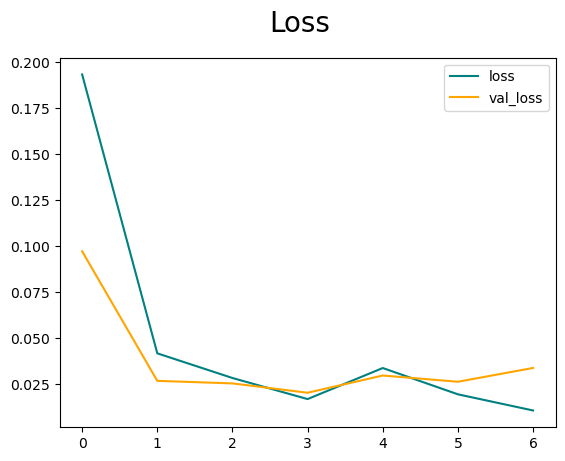

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

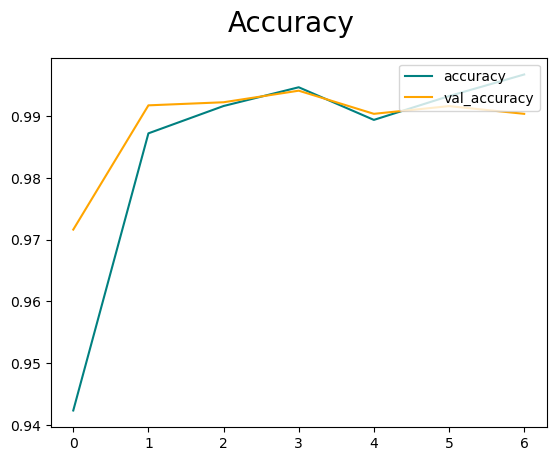

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper right')
plt.show()

### 7. Evaluate the model

In [28]:
# METHOD 1
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

y_pred = model.predict(val)
# y_pred is probability, needs to convert to category
# probability less than 0.5 is class0
# probability more than 0.5 is class1
y_pred = np.where(y_pred > 0.5, 1, 0) 
y_test = tf.concat([y for x,y in val], axis=0)

# print Classification report
print(classification_report(y_test,y_pred))

250/250 [==============================] - 22s 30ms/step
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      4047
           1       0.49      0.50      0.49      3953

    accuracy                           0.50      8000
   macro avg       0.50      0.50      0.50      8000
weighted avg       0.50      0.50      0.50      8000



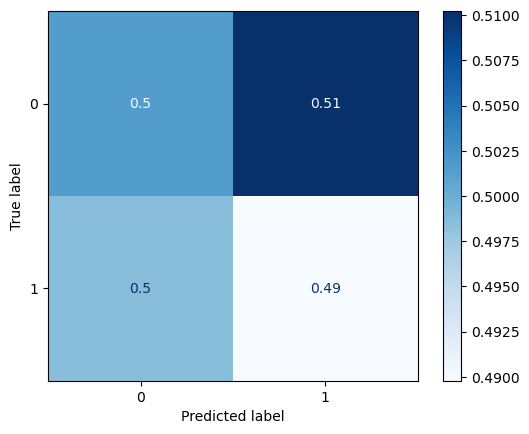

In [29]:
# METHOD 2
cm = confusion_matrix(y_test,y_pred,normalize='pred')
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap=plt.cm.Blues)
plt.show()

### 8. Model Deployment

In [31]:
import cv2

### Negative image/not cracked concrete

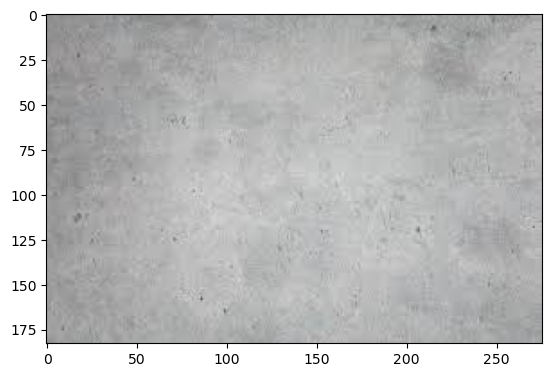

In [34]:
# place the name of the image you want to use
# to test deploy your model
img = cv2.imread(r'Test image\negative.jpeg') 
plt.imshow(img)
plt.show()

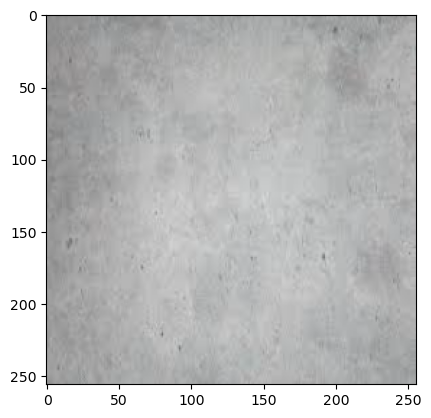

In [35]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
y_pred = model.predict(np.expand_dims(resize/255,0))
print(y_pred)

1/1 [==============================] - 0s 23ms/step
[[0.00033105]]


In [45]:
if y_pred > 0.5:
    print('Predicted class is Positive') # class 1
else:
    print('Predicted class is Negative') # class 0

Predicted class is Negative


### Positive image/cracked concrete

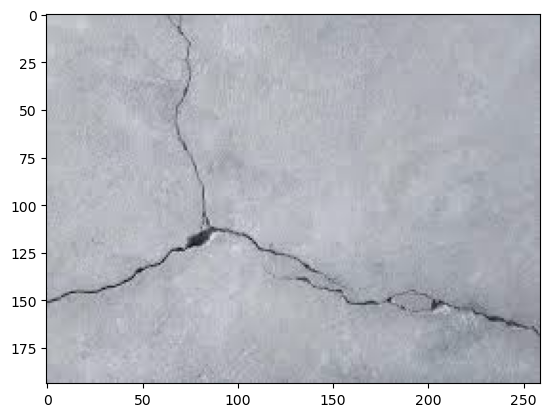

In [46]:
img2 = cv2.imread(r'Test image\positive.jpeg') 
plt.imshow(img2)
plt.show()

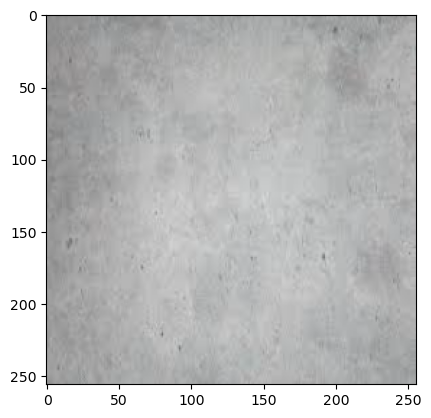

In [40]:
resize2 = tf.image.resize(img2,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
y_pred2 = model.predict(np.expand_dims(resize2/255,0))
print(y_pred2)

1/1 [==============================] - 0s 29ms/step
[[0.99967337]]


In [43]:
if y_pred > 0.5:
    print('Predicted class is Positive') # class 1
else:
    print('Predicted class is Negative') # class 0

Predicted class is Positive
